# Portfolio Theory Basics -- Part 01

## 0. Preparations

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('dark_background')

import yfinance as yf
from tqdm import tqdm

##1. Generation of random number series

* two series of N random numbers   
* normally distributed, parameters ($\mu_1$, $\mu_2$) and ($\sigma_1$, $\sigma_2$)
*   given correlation coefficient $\rho$



In [2]:
def generate_correlated_data(mean, std_dev, rho, n):
    ''' generate two series of normally distributed random numbers with different means and standard deviations
        and a given correlation coefficient.
    Parameters:
        mean (tuple): mean of both distributions, i.e. (mu1, mu2).
        std_dev (tuple): standard deviations of both distributions, i.e. (sigma1, sigma2).
        rho (float): given correlation coefficient (between -1 und 1).
        n (int): number of elements in the wo series.
    Returns:
        tuple: two arrays containing correlated random numbers.
    '''

    # calculation of covariance matrix
    cov_matrix = [
        [std_dev[0]**2, rho * std_dev[0] * std_dev[1]],
        [rho * std_dev[0] * std_dev[1], std_dev[1]**2]
    ]

    # random number generation
    data = np.random.multivariate_normal(mean, cov_matrix, n)

    return data

In [3]:
def plot_data(data, title):
    ''' plotting function '''

    x, y = data[:,0], data[:,1]
    m, b = np.polyfit(x, y, 1)  # Fit a linear regression (degree 1)
    plt.plot(x, m*x + b, color='red', label='Correlation Curve')
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel('series 1: ($x_{1}$)')
    plt.ylabel('series 2: ($x_{2}$)')
    plt.show()

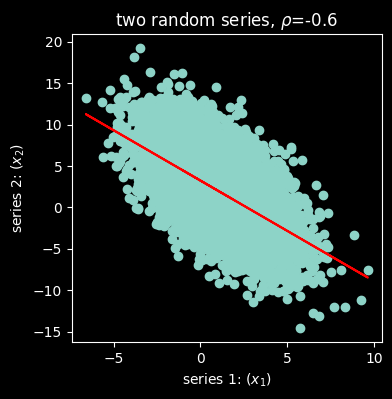


 ** Statistical Parameters **
 means:                     [1.032708 2.000927]
 standard deviations:       [1.996026 4.039915]
 correlation coefficient:   -0.599907


In [14]:
# preparations
mean, std_dev, rho = (1, 2), (2, 4), -0.6   # parameter of distributions
n = 10000                                   # Anzahl der Stichproben
plt.figure(figsize=(4, 4))

# data generation
data = generate_correlated_data(mean, std_dev, rho, n)

#plotting & printing
plot_data(data, f'two random series, $\\rho$={rho}')
print('\n ** Statistical Parameters **' )
print(f' means:                     {np.mean(data, axis=0).round(6)}')
print(f' standard deviations:       {np.std(data, axis=0).round(6)}')
print(f' correlation coefficient:   {np.corrcoef(data[:,0], data[:,1])[0, 1]:.6f}')

# 2. Simulating weighed portfolios of two series
For the different portfolios, formed from two series using different weights(w)  the following parameters are caclulated:
* mean sum of portfolio (as function of weights w)
* standard deviations of sum (as function of weights)
* meanvs standard deviation of sum

The curves were obtained for a given correlation coefficient rho

<Figure size 600x300 with 0 Axes>

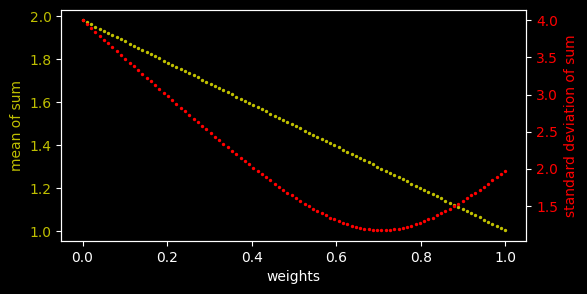

In [5]:
# preparations
mean, std_dev, rho = (1, 2), (2, 4),  -0.6  # parameter of distribution
n = 10000                                    # number of elements in the time series
plt.figure(figsize=(6, 3))

# data generation
data = generate_correlated_data(mean, std_dev, rho, n)

# preparation of simulation
ws = np.linspace(0, 1, 100)
pf_mean = np.zeros(len(ws))
pf_std = np.zeros(len(ws))

# simulating of portfolio retruns
for j, w in enumerate(ws):
    pf_rets = w * data[:,0] + (1 - w) * data[:,1]
    pf_mean[j] = np.mean(pf_rets)
    pf_std[j] = np.std(pf_rets)

plt.figure(figsize=(6, 3))

# Scatter plot for mean returns
plt.scatter(ws, pf_mean, s=2, label='means', color='y')
plt.ylabel('mean of sum', color='y')
plt.tick_params(axis='y', labelcolor='y')
plt.xlabel('weights')

# Secondary y-axis for std of return
plt.twinx()
plt.scatter(ws, pf_std, s=2, label='std', color='r')
plt.ylabel('standard deviation of sum', color='r')
plt.tick_params(axis='y', labelcolor='r')

plt.show()

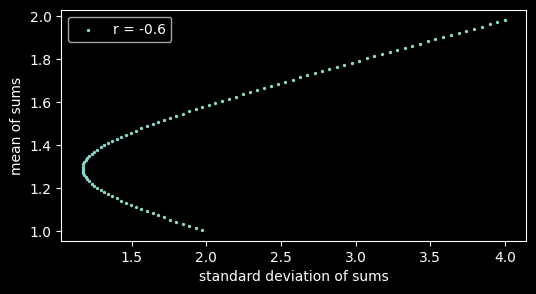

In [6]:
# alternative plot of data
plt.figure(figsize=(6, 3))
plt.scatter(pf_std, pf_mean, s=2, label=f'r = {rho:.1f}')
plt.legend()

plt.xlabel('standard deviation of sums')
plt.ylabel('mean of sums')
plt.show()

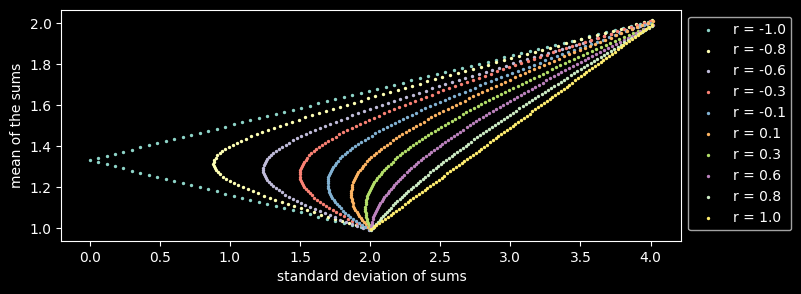

In [7]:
# portfolio simulations for different combination of weights (w) and correlation (rho)

# preparations
rs = np.linspace(-1, 1, 10)     # intervall for correlation coefficient (rho)
ws = np.linspace(0, 1, 100)     # intervall for weights (ws)
nb_ptf = 100000                 # number of portfolios per simulation run
plt.figure(figsize=(8, 3))

# simulation of portfolio returns and standard deviations for combinations of ws and rho
for r in rs:
    mean, std_dev, rho = (1, 2), (2, 4), r                          # parameter of distribution
    data = generate_correlated_data(mean, std_dev, rho, nb_ptf)     # data generation
    pf_mean = np.zeros(len(ws))
    pf_std = np.zeros(len(ws))
    for j, w in enumerate(ws):
        pf_rets = w * data[:,0] + (1 - w) * data[:,1]
        pf_mean[j] = np.mean(pf_rets)
        pf_std[j] = np.std(pf_rets)
    plt.scatter(pf_std, pf_mean, s=2, label=f'r = {r:.1f}');

# plotting
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('standard deviation of sums')
plt.ylabel('mean of the sums')
plt.show()

## 3. Link to modern portfolio theory (MPT)
The section comprises:
* download of real stock data
* calculation of key parameters of daily returns of portfolio members
* calculation of portfolio-parameters for different weights
* transfer daily data to annual data


In [8]:
# downloading real stock-data
tickers = ['SAP.DE', 'DHL.DE']
data = yf.download(tickers, start='2020-01-01', end='2024-12-31')['Close']
all_rets = data.pct_change(fill_method=None).dropna()

[*********************100%***********************]  2 of 2 completed


In [9]:
all_rets

Ticker,DHL.DE,SAP.DE
Date,,
2020-01-03,-0.014146,-0.012623
2020-01-06,-0.005178,-0.007471
2020-01-07,0.008773,0.004517
2020-01-08,0.010613,0.005995
2020-01-09,0.010064,0.019368
...,...,...
2024-12-19,-0.005636,-0.013525
2024-12-20,0.003580,-0.001266
2024-12-23,-0.000892,-0.001690


In [10]:
my_1 = all_rets['SAP.DE'].mean()
my_2 = all_rets['DHL.DE'].mean()
print(f'mean daily return SAP:{my_1:.5f}                mean daily return DHL:{my_2:.5f}')

sig_1 = all_rets['SAP.DE'].std()
sig_2 = all_rets['DHL.DE'].std()
print(f'std deviation daily return SAP:{sig_1:.5f}       std deviation daily return DHL:{sig_2:.5f}')

mean daily return SAP:0.00077                mean daily return DHL:0.00017
std deviation daily return SAP:0.01705       std deviation daily return DHL:0.01833


In [11]:
# Calculate the correlation coefficient
corr_coeff = all_rets['SAP.DE'].corr(all_rets['DHL.DE'])

# Display the correlation coefficient
print(f'correlation_coefficient: {corr_coeff:.5f}')

correlation_coefficient: 0.50760


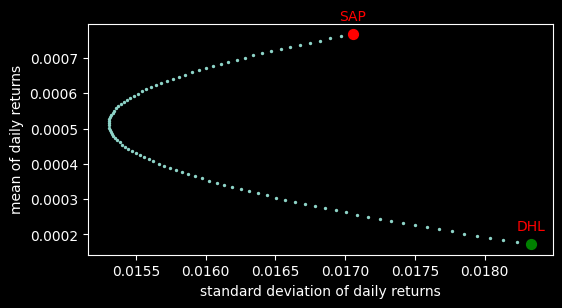

In [12]:
# preparation
ws = np.linspace(0, 1, 100)
pf_mean = np.zeros(len(ws))
pf_std = np.zeros(len(ws))

#calculation of parameters for different weights
for i, w in enumerate(ws):
    pf_rets = w * all_rets['SAP.DE'] + (1 - w) * all_rets['DHL.DE']
    pf_mean[i] = np.mean(pf_rets)
    pf_std[i] = np.std(pf_rets)

# alternative plot of data
plt.figure(figsize=(6, 3))
plt.scatter(pf_std, pf_mean, s=2)

# plot of single stokc data
plt.scatter(sig_1, my_1, color='red', marker='o', s=50)
plt.annotate('SAP', (sig_1 , my_1), textcoords="offset points", xytext=(0, 10), ha='center', color='red')
plt.scatter(sig_2, my_2, color='green', marker='o', s=50)
plt.annotate('DHL', (sig_2 , my_2), textcoords="offset points", xytext=(0, 10), ha='center', color='red')


plt.xlabel('standard deviation of daily returns')
plt.ylabel('mean of daily returns')
plt.show()

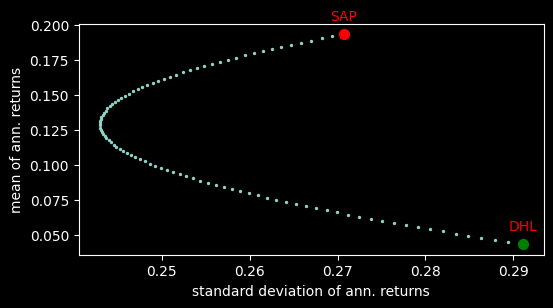

In [13]:
# preparation
ws = np.linspace(0, 1, 100)
pf_mean = np.zeros(len(ws))
pf_std = np.zeros(len(ws))

#calculation of parameters for different weights
for i, w in enumerate(ws):
    pf_rets = w * all_rets['SAP.DE'] + (1 - w) * all_rets['DHL.DE']
    pf_mean[i] = np.mean(pf_rets) *252
    pf_std[i] = np.std(pf_rets) * np.sqrt(252)

# alternative plot of data
plt.figure(figsize=(6, 3))
plt.scatter(pf_std, pf_mean, s=2)

# plot of single stokc data
sig_1 = sig_1 * np.sqrt(252)
sig_2 = sig_2 * np.sqrt(252)
my_1 = my_1 *252
my_2 = my_2 *252
plt.scatter(sig_1, my_1, color='red', marker='o', s=50)
plt.annotate('SAP', (sig_1 , my_1), textcoords="offset points", xytext=(0, 10), ha='center', color='red')
plt.scatter(sig_2, my_2, color='green', marker='o', s=50)
plt.annotate('DHL', (sig_2 , my_2), textcoords="offset points", xytext=(0, 10), ha='center', color='red')


plt.xlabel('standard deviation of ann. returns')
plt.ylabel('mean of ann. returns')
plt.show()

3.